In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipyvolume as ipv
from matplotlib import cm

%matplotlib inline

# CS231n - Day1 (Lecture 1-3)

## Introduction

* CS231n is about visual recognition


* Why is that important?
    1. Increase in number of sensors (e.g. camera)  
        * Exponential growth in visual data
        * Most of the data flying around in the internet right now is **visual** data  
    2. Visual data $\sim$ Dark matter of the internet
        * In the sense that they take the *majority*, yet they are *hard to recognize*
        
        
* Huge breakthrough in 2012 (Alexnet)
    * But the concept itself is not quite new! (e.g. LeCun)
    * Then why did it rise so late?
        1. Number of transisters(CPU)
        2. GPU
        3. Number of datasets ($10^7_{MNIST}$ vs $10^{14}_{ImageNET}$)
        

* There's still a **lot** of challenges left to tackle!
    * Object detection at pixel level
    * Movement / activity detection
    * The **"Holy grail"** - to 'understand' the story of an image in a deep and rich manner.
    
      

## Classifiers

* Why is image recognition hard?
    * Image can only be represented as an array of *numbers*
    * So much *variances*
        * Viewpoint variation
        * Illumination
        * Deformation (Posing)
        * Occlusion (Covered)
        * Intraclass variation
        * Background clutter
     
     
* Image classification in a nutshell
$$
Image \rightarrow \left (\begin{matrix} \\Classifier\\ \\ \end{matrix} \right) \rightarrow Prediction
$$
<p style="text-align: center;">
$\downarrow$<br>What should be here?
</p>    

#### 1. Rule base

* Find edges, corners, hard code for each class.
* Super brittle, super inefficient.
* NO.
    
    
#### 2. KNN (K-nearest neighbor)
* Train : Memorize all training data. 
* Evaluate : Compute distance between input image and each trained image. Then vote from top k closest images.


* Distance metrics  
    $L1 : \sum_i|p_{1i} - p_{2i}|$  
    $L2 : \sqrt{\sum_i(p_{1i} - p_{2i})^2}$  
    ...basically can be anything


* Works, but still not a good choice
    1. Distance metric is not very meaningful. 
         * L1,L2 distance can be easily manipulated, such that two completely different images can have the same distance from an image we want to classify.
    2. Curse of dimensionality  
        * Each image can be represented as points on $\mathbb{R}^{number-of-pixels}$, and their coordinates represented by each pixel values. 
        * Number of pixels = Number of axis = 255x bigger image space (in monochrome)
        * To make an effective classifier, the image space has to be filled. (so that it can properly know which class is 'close')
        * So for bigger images or higher resolutions, this is practically impossible.
    3. Speed
        * KNN : Fast training(O(1)) / Slow evaluating(O(N))
        * Ideal : Slow training / Fast evaluating
            
            
            
#### 3. Linear classifier
$$
\begin{matrix}
Image & \rightarrow & f(x,W) & \rightarrow & Score \\
 & & & &  & \Rightarrow Prediction \\
x & \rightarrow\ & Wx + b & \rightarrow &  s \\
3072 \times 1 & & (10 \times 3072) (10 \times 1) && 10 \times 1
\end{matrix}
$$

* Linear classifier as decision boundaries
    * Each row of W are inner dot producted with the image.
    * Which means each row of $W$ can be interpreted as a linear decision boundary, since it has constant coefficient(values of $W$) for each variable(values of $x$).
    * $W$ spins the boundary, and  
      $b$ translates the boundary, so that they're not origin-oriented 
      
      
      
* Linear classifier as templates
    * $i$th result from dot producting $i$th row with $x$ will be the score of $i$th class (i.e. how much the classifier thinks the given image is in that class) 
    * So each rows of W are trying to find how its corresponding class should look like.
    * As a result, each row of W becomes a 'template' for its corresponding class.
    
    
* Linear classifier as NN
    * Instead of memorizing every single training image, just create one image for each class!
    * Instead of L1 and L2 metric, use inner-product metric!
    * Linear classifier is basically a fancy NN.

    
* Better, but still has limits
    1. Since all decision boundaries are all linear(and combining linear things are also linear), it cannot solve **non-linear** problems. 
    2. The classifier cannot contain enough data representation. One template for each class is not enough to include every variances (viewpoint, intraclass variation, etc).  
    e.g. Red car facing left / Blue car facing front / Green car facing back

# 🤔

* Bias gives data independent preferences for certain classes over another. I get that, why would it give more preference to a class that has MORE data?

# Loss functions ("How bad is the W?")
<br>
$$
Image \rightarrow f(x,W) \rightarrow Score \Rightarrow L(s,y) \Rightarrow Loss
$$


#### 1. SVM (Multiclass support vector machine / Hinge loss)  
* "The score of the correct class($s_{y_i}$) should be higher than other scores($s_j$) by a certain margin($\Delta$)."
    
    The loss of $i$th image is$$ L_i = \sum_{j \ne y_i} max(0, s_j - s_{y_i} + \Delta)$$
    and total loss is$$ L = \frac{1}{m}\sum_iL_i $$
    so basically$$ L = \frac{1}{m}\sum_{i}\sum_{j \ne y_i} max(0, W^T_jx_i - W^T_{y_i}x_{i} + \Delta)$$  

* Value of $\Delta$ doesn't matter, since the weights can arbitrarily scale through different delta values. Still, they can work similar to the regularization strength $\lambda$.

#### 2. Regularization
* Choosing W
    * Is the $W$ for $Loss=0$ unique?
    * No. On SVM $2W$ and $3W$ also will(possibly not $0.5W$), since it'll just scale the whole score by the same constant. (Remember linear!)
    * So with all these infinitely many possible $W$'s that are all perfect, which one should we choose?
    * K.I.S.S and Occam's Razor : Make it as simple as possible! Make the weights smaller  
 <br>     
* Use regularization!
    * Regularization penalizes the weights for being to large, and thus being complex.
    * The classifier can have a more complex form, but it has to overcome the regularization penalty to do so.
    * Where $\lambda$ is the regularization strength, a hyperparameter.  
    $$
        L := L + \lambda R(W)
    $$  

* Regularization metrics
    * L1 :$ R(W) = \sum_k\sum_l w^2_{k,l} $
    * L2 :$ R(W) = \sum_k\sum_l |w_{k,l}| $  
    
    
* $\Delta$ and $\lambda$
    * Both tradeoff between loss from data and loss from regularization. Delta is the mandatory gap the classifier has to make, which makes it scale its weights up or down to match to gap. 
    * For example, the two inner products would be $$w_{11}x_1 + w_{12}x_2 + w_{13}x_3 = s_1$$ and $$w_{21}x_1 + w_{22}x_2 + w_{23}x_3 = s_2$$ so that $$\Delta = s_2 - s_1 = (w_{21}-w_{11})x_1 + (w_{22}-w_{12})x_2 + (w_{23}-w_{13})x_3$$ Then scailing $$W := 2W$$ would give $$\Delta' = (2w_{21}-2w_{11})x_1 + (2w_{22}-2w_{12})x_2 + (2w_{23}-2w_{13})x_3 = 2((w_{21}-w_{11})x_1 + (w_{22}-w_{12})x_2 + (w_{23}-w_{13})x_3)$$ so $$\Delta' = 2\Delta$$ and In this sense, Delta works just like lambda.
    * As a result, we don't need to care about delta, since lambda can do the work.
    
#### 3. Cross-entropy loss (Softmax)
* Softmax function
    * The score from $Wx+b$ is hard to interpret. We need something to make it clearer.
    * Score $\rightarrow$ Normalized probability
    $$
    s_j := \frac{s_j}{\sum_i s_i}
    $$
    such that
    $$
    \sum_i s_i = 1
    $$
    Now that's better! All we need is a new loss function for this.


* Cross-entropy
    $$
        L_i = -log(s_{y_i})
    $$
    so basically
    $$
        L_i = -log(\frac{e^{W^T_{y_i}x_i}}{\sum_j e^{W^T_{j}x_i}})
    $$
    or
    $$
        L_i = -log(e^{W^T_{y_i}x_i}) + log(\sum_j e^{W^T_{j}x_i})
    $$

    * Cross-entropy loss vs Hinge-loss
    Hinge loss will satisfy after a certain margin, but cross-entropy loss will never be satisfied and will forever try to improve the weights. This is because it interprets the scores as probability, and it uses exponential function. For cross-entropy loss to be (near) 0, $ s_{y_i} \rightarrow \infty $ and $ s_j (j \ne y_i) \rightarrow -\infty$.  
    
    * Numerical stability  
      Also exponential functions can blow up so easily!

In [2]:
# Even 1000 is too much for exp
f = np.array([-1000, 0, 500, 1000])
print(np.exp(f))

[0.00000000e+000 1.00000000e+000 1.40359222e+217             inf]


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Apparently exponential functions can't handle large numbers very well. But it seems like they can handle smaller or negative numbers!
We can fix this by fixing the maximum value to 0, while keeping the same loss formula.
$$
L_i = -log(\frac{e^{W^T_{y_i}x_i}}{\sum_j e^{W^T_j x_i}})
= -log(\frac{C e^{W^T_{y_i}x_i}}{C \sum_j e^{W^T_j x_i}})
= -log(\frac{e^{W^T_{y_i}x_i + logC}}{\sum_j e^{W^T_j x_i + logC}}) 
$$

So we can add/subtract same values from $f = Wx$ and still have the same loss function!

In [3]:
# Beware; -2000 is also harsh for exp.
f -= np.max(f)
print(np.exp(f))

[0.00000000e+000 0.00000000e+000 7.12457641e-218 1.00000000e+000]


# Optimization

Now that we know how terrible our W is, are we just gonna cry? Piss our pants maybe? No, we're making it better!

But how?

#### 1. Random search
Props to https://www.youtube.com/watch?v=DaPJkYo2quc
![Yes](bogobest.png)

Solving the system is extremely difficult and will even become impossible once we step into neural networks. Instead of trying to find the solution at once, we want to find the solution gradually, step by step.

#### 2. Random local search
* Choose a random direction everytime.
* Bogo bad

#### 3. Gradient descent
1. Compute gradient

2. Go down

3. That's all

# Gradient descent

...or is it?

#### 1. Gradient
* Numerical gradient
    * By the definition of gradient
    $$
    \frac{\delta f(x)}{\delta x} = \lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}
    $$
    or use the *centered formula* for better results
    $$
    \lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}
    $$
    * This is super easy, but slow and expensive. It's also unaccurate and numerically unstable, since h must be near 0.
    * Great as a debugging tool


* Analytic gradient
    * Use calculus
    * Quite easy to make mistakes, but much faster, since it's all hard coded into one formula!

#### 2. Descent
$$
W := W - \alpha \frac{\delta L}{\delta W}
$$

* Hyperparameter $\alpha$
    * Decides your "step size"
    * Your direction is technically optimal only for an extremely small step size, because of the nature of derivative($\lim_{h\rightarrow 0}$). Imagine going downhill from Mt. BaekDu. When $\alpha$ is too big, you'll end up in Busan in one step. But when it's too small, you'll probably starve to death before even halfway there to the destination. Choosing the right step size is extremely important.
    

#### 3. Mini-batch gradient descent
* When there are millions of image in training set, we can't perform gradient descent over every single image at once. We'll just constantly pick random 256(or other power of 2) images and train with these.
* Why power of 2?
    * Many vectorized operations work faster when the inputs are the power of 2.

#### 4. Stochastic gradient descent
* Train with only one image every iteration.
* Mini-batch is better, since we can vectorize the process to compute at once.
* Weirdly enough, **also refers to mini-batch gradient descent**.

# 🤔

Why should gradient descent work? $\frac{\delta z}{\delta x} = k$ means nothing more than "When $x$ increases by a small number $h$, $z$ increases by $kh$". $k$ is the 'proportion' **OF** $z$ in relation to $x$. Why should it be the direction of $x$?

First of all, I didn't see that looking at more than one variable gives you **infinite** possible paths. Unlike when looking at only one direction, which in turn will have only two choices: front or back. So the '$k$' not only contains the sudden steepness, it also contributes to the vector of direction we need to go. Now, how can we make sure that the gradient is actually the best path?

Let's first think on a linear plane.

In [2]:
x,y = np.meshgrid(range(-2,13), range(-2,13))
z = (-x+y)

ipv.figure()
ipv.scatter(np.array([8.]),np.array([2.]),np.array([-6.]), marker = 'sphere')
ipv.plot_surface(x,y,z, color='skyblue')
ipv.plot_wireframe(x,y,x*0, color='white')
ipv.plot([0,10], [0,10], [0,0], color='black')
ipv.plot(np.array([8,5,2]),np.array([2,5,8]),np.array([0,0,6]))
ipv.plot(np.array([8,8]),np.array([2,2]),np.array([-6,0]))
ipv.plot(np.array([8,4,0]),np.array([2,4,6]),np.array([0,0,6]))
ipv.plot(np.array([8,3,-2]),np.array([2,3,4]),np.array([0,0,6]))
ipv.plot(np.array([8,6,4]),np.array([2,6,10]),np.array([0,0,6]))
ipv.plot(np.array([8,7,6]),np.array([2,7,12]),np.array([0,0,6]))
ipv.plot(np.array([4.5,5,5.5]),np.array([4.5,4,4.5]),np.array([0,0,0]), color='black')
ipv.plot(np.array([-2,6]),np.array([4,12]),np.array([6,6]), color='blue')
ipv.show()

Suppose we want to take a step to maximize z from the red point(8,2,-6). Note that we cannot touch z's value, we can only optimize z by updating x and y. The red lines on the white grid(which is xy-plane) are 5 of infinite possible direction to choose from, and the blue line indicates where z=6 on the plane. Here, we can see that the direction that is perpedicular to the black line(intesection of blue plane and xy-plane) is in fact also perpendicular to the blue line, meaning that this is the fastest direction to reach z=6. (I've kinda misdrew this as the 'step' starts on the xy-plane and not to red point, but this doesn't matter on a plane.)

Let's see if that direction is the same as the gradient. A plane's general formula would be
$$
ax+by+cz=d
$$
and the intersection of this plane and xy-plane would be
$$
ax+by=d
$$
so the vector of intersection line would be
$$
\vec{v} = (-b, a, 0)
$$
And the gradient of x and y in respect to z would be
$$
(\frac{\delta z}{\delta x},\frac{\delta z}{\delta y})= (a,b)
$$
Finally, inner dot producting these to give
$$
(a,b) \cdot (-b,a) = -ab+ba = 0
$$
OH, so they ARE perpendicular! Now we know that the gradient is the optimal direction on a plane!

But what about non-linear functions? If they are not planes, this logic won't work!  
We can solve this by getting a tangent plane on current point. Then we can put linear planes on non-linear spaces, and do the same thing again!

In [3]:
x,y = np.meshgrid(range(-10,10), range(-10,10))
paraboloid = x*x + y*y
# -8(x-4) -6(y-3) + (z-25) = 0
tangent_plane = 8*(x-4) + 6*(y-3) + 25 
ipv.figure()
obj = ipv.plot_surface(x,y,paraboloid)
obj.color = [.3,.3,.2,.7]
obj.material.transparent = True
ipv.plot_surface(x,y,tangent_plane, color='white')
ipv.scatter(np.array([4., 0.]),np.array([3., 0.]),np.array([25., 0.]), marker='sphere', color='white')
ipv.plot(np.array([4, 0]),np.array([3, -1]),np.array([25, 1]))
ipv.plot(np.array([4, 0, 0]),np.array([3, -1, -1]),np.array([25, -31, 1]))
ipv.show()

Note that following the red line on the paraboloid doesn't actually directly lead to the critical point(white in the center). This is not because the gradient is wrong, but because gradient only finds the best path **in its local region**. That's why we have to iterate through this multiple times, with small steps.

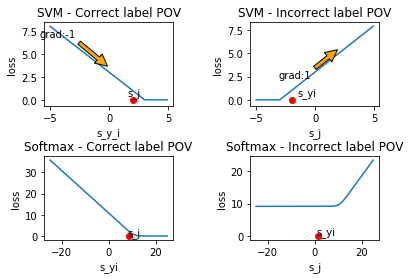

In [28]:
#SVM visualization
delta = 1

s_j = 2
s_yi = np.arange(-5,5,.1)
loss = np.maximum(np.zeros(len(s_yi)),s_j-s_yi+delta)
plt.subplot(2,2,1)
plt.plot(s_yi, loss)
plt.annotate("grad:-1", xy=(0, 3.5), xytext=(-70, 30), textcoords='offset points',
            arrowprops=dict(facecolor='orange', shrink=0.05))
plt.annotate("s_j", xy=(s_j-.5,.5))
plt.scatter(s_j,0, c='red')
plt.xlabel("s_y_i")
plt.ylabel("loss")
plt.title("SVM - Correct label POV")

s_yi = -2
s_j = np.arange(-5,5,.1)
loss = np.maximum(np.zeros(len(s_j)),s_j-s_yi+delta)
plt.subplot(2,2,2)
plt.plot(s_j, loss)
plt.annotate("grad:1", xy=(2,5.5), xytext=(-60, -30), textcoords='offset points',
            arrowprops=dict(facecolor='orange', shrink=0.05))
plt.annotate("s_yi", xy=(s_yi+.5,.5))
plt.scatter(s_yi, 0, c='red')
plt.ylabel("loss")
plt.xlabel("s_j")
plt.title("SVM - Incorrect label POV")

#Softmax visualization
yi = 3
j = 1
s = np.random.rand(10,1)*10
temp_score = np.sum(np.exp(s))-np.exp(s[yi])
s_yi = np.arange(-25,25,.1)
softmax_yi = np.exp(s_yi) / (np.exp(s_yi) + temp_score)
loss = -np.log(softmax_yi)
plt.subplot(2,2,3)
plt.xlabel("s_yi")
plt.ylabel("loss")
plt.annotate("s_j", xy=(s[j]-.5,.5))
plt.scatter(s[j],0, c='red')
plt.plot(s_yi, loss)
plt.title("Softmax - Correct label POV")

s = np.random.rand(10,1)*10
temp_score = np.sum(np.exp(s))-np.exp(s[j])
s_j = np.arange(-25,25,.1)
softmax_ji = np.exp(s[yi]) / (temp_score + np.exp(s_j))
loss = -np.log(softmax_ji)
plt.subplot(2,2,4)
plt.xlabel("s_j")
plt.ylabel("loss")
plt.annotate("s_yi", xy=(s[yi]-.5,.5))
plt.scatter(s[yi],0, c='red')
plt.plot(s_j, loss)
plt.title("Softmax - Incorrect label POV")

plt.subplots_adjust(wspace=.6, hspace=.6)
plt.show()

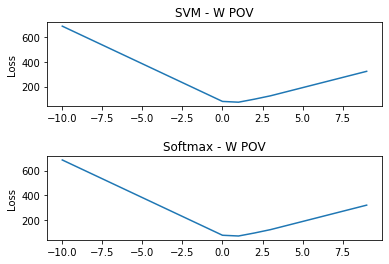

In [159]:
# SVM visualization, this time while changing values W
delta = 1
yi = 2

x = np.append(np.random.rand(1,5)*10, np.ones(1))
W = np.random.rand(6,10)*10
del_W = np.random.rand(6,10)*10
#del_W = np.zeros((6, 10))
#del_W[0,0] = 1
#del_W[1,1] = -1
alpha = np.arange(-10, 10, 1)

svm_loss = []
softmax_loss = []

for a in alpha:
    score = np.dot(x, W+del_W*a)
    svm_loss.append(np.sum(np.max(score - score[yi] + delta, 0)) - delta)
    
    score -= np.max(score) # numerical stability
    softmax = np.exp(score[yi]) / np.sum(np.exp(score))
    if softmax != 0:
        softmax_loss.append(-np.log(softmax))
    else:
        softmax_loss.append(0)

plt.subplot(2,1,1)
plt.plot(alpha, svm_loss)
plt.ylabel("Loss")
plt.title("SVM - W POV")

plt.subplot(2,1,2)
plt.plot(alpha, softmax_loss)
plt.ylabel("Loss")
plt.title("Softmax - W POV")

plt.subplots_adjust(hspace = .6)
plt.show()

# 🤔

* Why does SVM loss change its trajectory 2 or 3 times when W changes in a random direction? When does it change 2 times? When 3 times?

## L1 vs L2

1. Rotation (L1,L2 as distance metric)
    * After rotating the coordinate system, the points that had the same L1 distance from the origin now has different distances. L2 on the other hand, is not effected by the rotation since it forms a circle.

![L1L2](L1andL2_1.png)

2. Feature representation 
    * L1 : When features have some meaning. (e.g. House price prediction, where features such as number of rooms, floors, garden size, number of bathrooms, etc has a clear meaning to the price.)
    * L2 : When features have no meaning or it's vague (e.g. Image detection, where each features are just pixel values that don't directly lead to a certain class.)
    
    * **Even with such intuition, trying out both is a better idea**

## Dataset partition (for tuning hyperparameter)

Keep in mind : **We are trying to evaluate WILD data, not training data.**
    
$\begin{matrix} 1: & ( & & & Train & & & ) \\
     2: & ( & & Train & & Test & & ) \\ 
     3: &( & Train & & Validation & & Test & ) \\
     4: &( & Fold1 & Fold2 & ... & Fold N & Test & )  \end{matrix}$  

1. Train 100% (X)
    * Overfitting train data is like preparing for a test by memorizing all the questions and answers in the textbook, 'understanding' nothing.
    * Yet overfitting for small data can be a good debug tool.
    
    
    
2. Train - Test (X)
    * Hard to check if current hyperparameter setting is good or not, because we cannot monitor test accuracy mid-training.
    * The hyperparameter setting can be 'perfect' for the test set by luck. (which is not lucky at all)
    

3. Train - Validation - Test (O)
    * Both validation and test set represent wild data, and will not be used to update the weights.
    * Weights are updated only by train set, and validation set is constantly evaluated so we can check mid-training if the classifier is overfitting or not training at all.
    * Test set is only evaluated once, at the very last stage.
   
   
4. Cross validation (O)
    * Great choice when dataset is small
    * Divide the dataset by N-fold and testset. Then train N-times separately, with each ith fold being the validation set in ith training.
    
    
* Make sure the partition is completely **random**.
    * Be sure to partition the dataset AFTER collecting all the data you need.
    * Otherwise the partition will become biased and the classifier won't be trained properly.
    
    
* Re-training with the testset after finding a good parameter can give you an additional 1% accuracy. 

# Train acc VS Val acc

* Capacity

* Regularization